# Which genes show co-expression patterns across basal and non-basal breast cancer samples?

In [2]:
import pandas as pd

df = pd.read_csv("breastcancer.csv", index_col=0)
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
labels = []
for col in df.columns:
    if "Basal" in col:
        labels.append("Basal")
    else:
        labels.append("Non-Basal")


In [4]:
X = df.T


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

labels = X.loc['type']

X_features_rows = X.drop('type', axis=0)

X_features_rows = X_features_rows.apply(pd.to_numeric, errors='coerce')

X_for_scaler = X_features_rows.T

X_scaled = StandardScaler().fit_transform(X_for_scaler)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    pcs,
    columns=["PC1", "PC2"]
)

pca_df["Subtype"] = labels


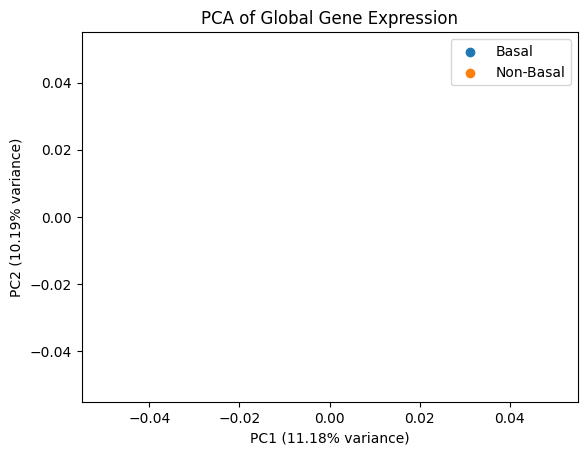

In [7]:
import matplotlib.pyplot as plt

for subtype in ["Basal", "Non-Basal"]:
    subset = pca_df[pca_df["Subtype"] == subtype]
    plt.scatter(subset["PC1"], subset["PC2"], label=subtype)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend()
plt.title("PCA of Global Gene Expression")
plt.show()


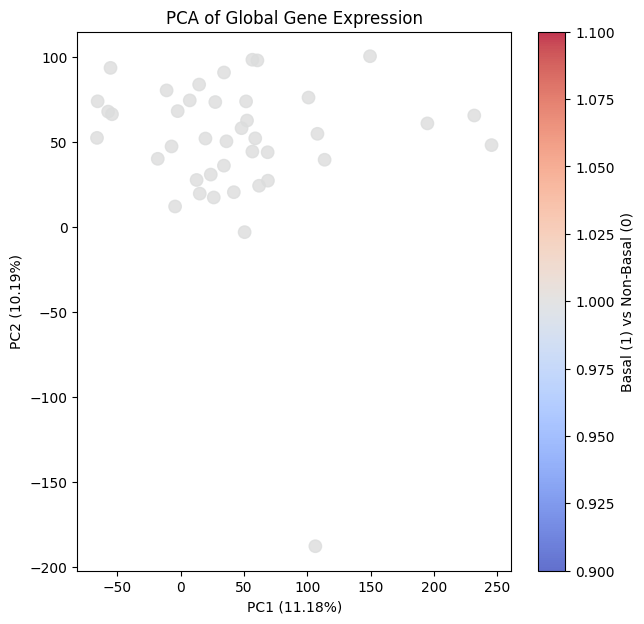

In [8]:
plt.figure(figsize=(7,7))


pca_df['Basal_Status'] = pca_df['Subtype'].map({'basal': 1, 'non-basal': 0})

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Basal_Status"],
    cmap="coolwarm",
    s=80,
    alpha=0.8
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.colorbar(label="Basal (1) vs Non-Basal (0)")
plt.title("PCA of Global Gene Expression")
plt.show()

(-0.1, 0.1)

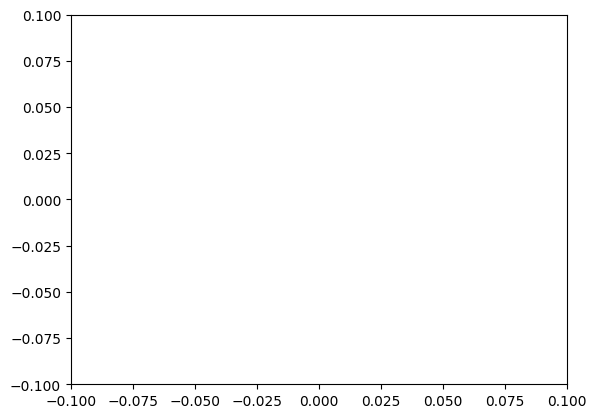

In [9]:
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)


In [10]:
pca_df[["PC1","PC2"]].head(10)


,PC1,PC2
0,-99.952221,-97.843696
1,-115.598325,-50.104864
2,-71.105809,-132.759510
3,-104.044899,-48.367469
4,-119.063994,-49.088820
5,-78.695444,-51.332720
6,-95.979329,-62.517100
7,-130.335375,-36.320170
8,-151.292709,-38.722642
9,-122.775463,-55.680685


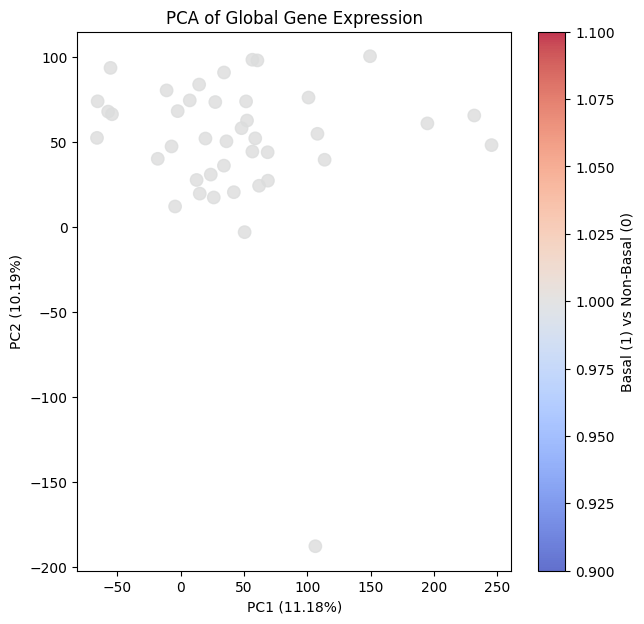

In [11]:
plt.figure(figsize=(7,7))


pca_df['Basal_Status'] = pca_df['Subtype'].map({'basal': 1, 'non-basal': 0})

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Basal_Status"],
    cmap="coolwarm",
    s=80,
    alpha=0.8
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.colorbar(label="Basal (1) vs Non-Basal (0)")
plt.title("PCA of Global Gene Expression")
plt.show()

In [12]:
import pandas as pd

metadata_df = pd.DataFrame(df['type'])
metadata_df.index.name = 'sample_id'
metadata_df.rename(columns={'type': 'subtype'}, inplace=True)

expression_df = df.drop(columns=['type'])
expression_df.index.name = 'sample_id'

basal_samples = metadata_df[metadata_df['subtype'] == 'basal'].index
non_basal_samples = metadata_df[metadata_df['subtype'] != 'basal'].index


basal_expr = expression_df.loc[basal_samples]
non_basal_expr = expression_df.loc[non_basal_samples]

In [13]:
import numpy as np
from scipy import stats

results = []

for gene in expression_df.columns:
    basal_values = basal_expr[gene]
    non_basal_values = non_basal_expr[gene]

    mean_basal = np.mean(basal_values)
    mean_non_basal = np.mean(non_basal_values)


    log2fc = np.log2((mean_basal + 1e-6) / (mean_non_basal + 1e-6))


    t_stat, p_value = stats.ttest_ind(basal_values, non_basal_values)

    results.append([gene, mean_basal, mean_non_basal, log2fc, p_value])

In [14]:
results_df = pd.DataFrame(results, columns=['Gene', 'Mean_Basal', 'Mean_Non_Basal', 'Log2FC', 'P_Value'])

top_basal = results_df.sort_values('Log2FC', ascending=False).head(20)['Gene']

top_non_basal = results_df.sort_values('Log2FC', ascending=True).head(20)['Gene']

top_genes = list(top_basal) + list(top_non_basal)

In [15]:
heatmap_data = expression_df[top_genes]
heatmap_data = heatmap_data.T

In [16]:

sample_colors = metadata_df['subtype'].map({'basal': 'orange', 'non-basal': 'blue'})


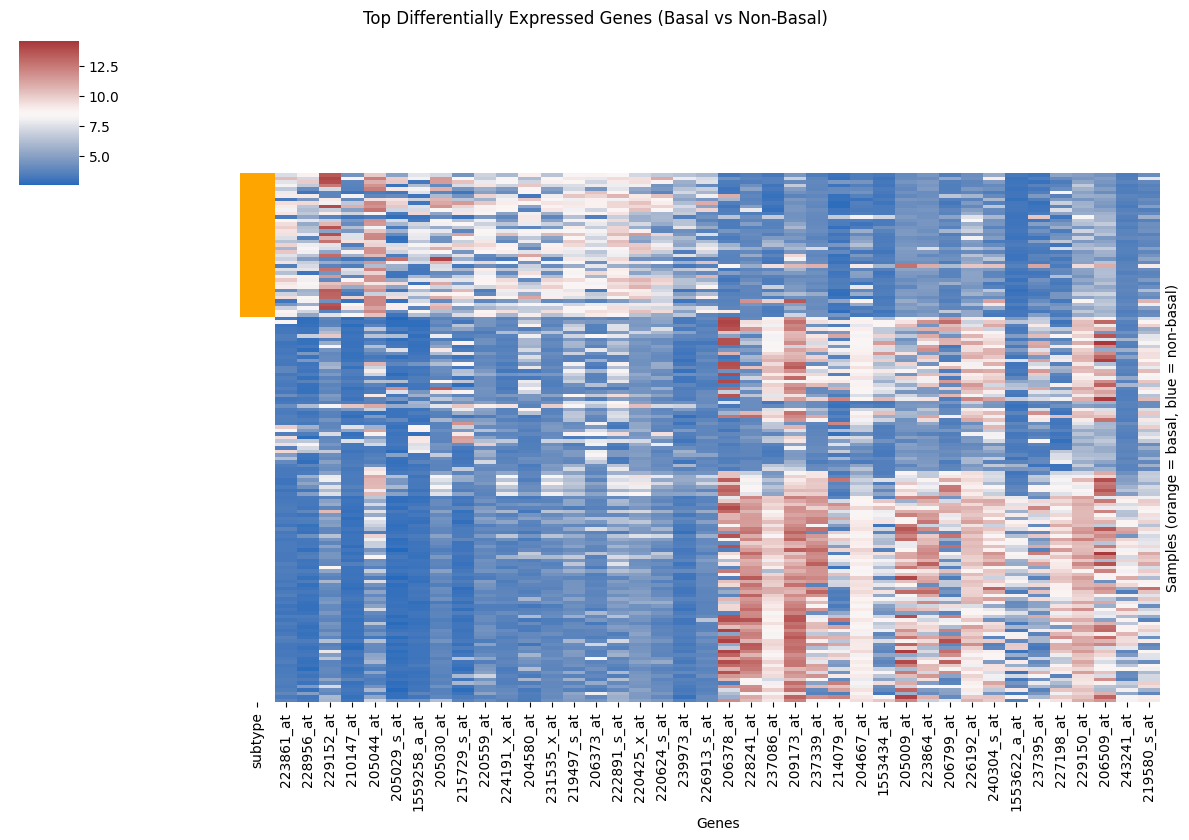

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_colors = metadata_df['subtype'].map({'basal': 'orange', 'non-basal': 'blue'})

heatmap_data_for_plot = heatmap_data.copy()

heatmap_data_for_plot = heatmap_data_for_plot.T

g = sns.clustermap(
    heatmap_data_for_plot,
    cmap='vlag',
    yticklabels=False,
    row_colors=sample_colors,
    row_cluster=False,
    col_cluster=False,
    figsize=(12, 8)
)

g.fig.suptitle("Top Differentially Expressed Genes (Basal vs Non-Basal)", y=1.02)
g.ax_heatmap.set_xlabel("Genes")
g.ax_heatmap.set_ylabel("Samples (orange = basal, blue = non-basal)")

plt.show()

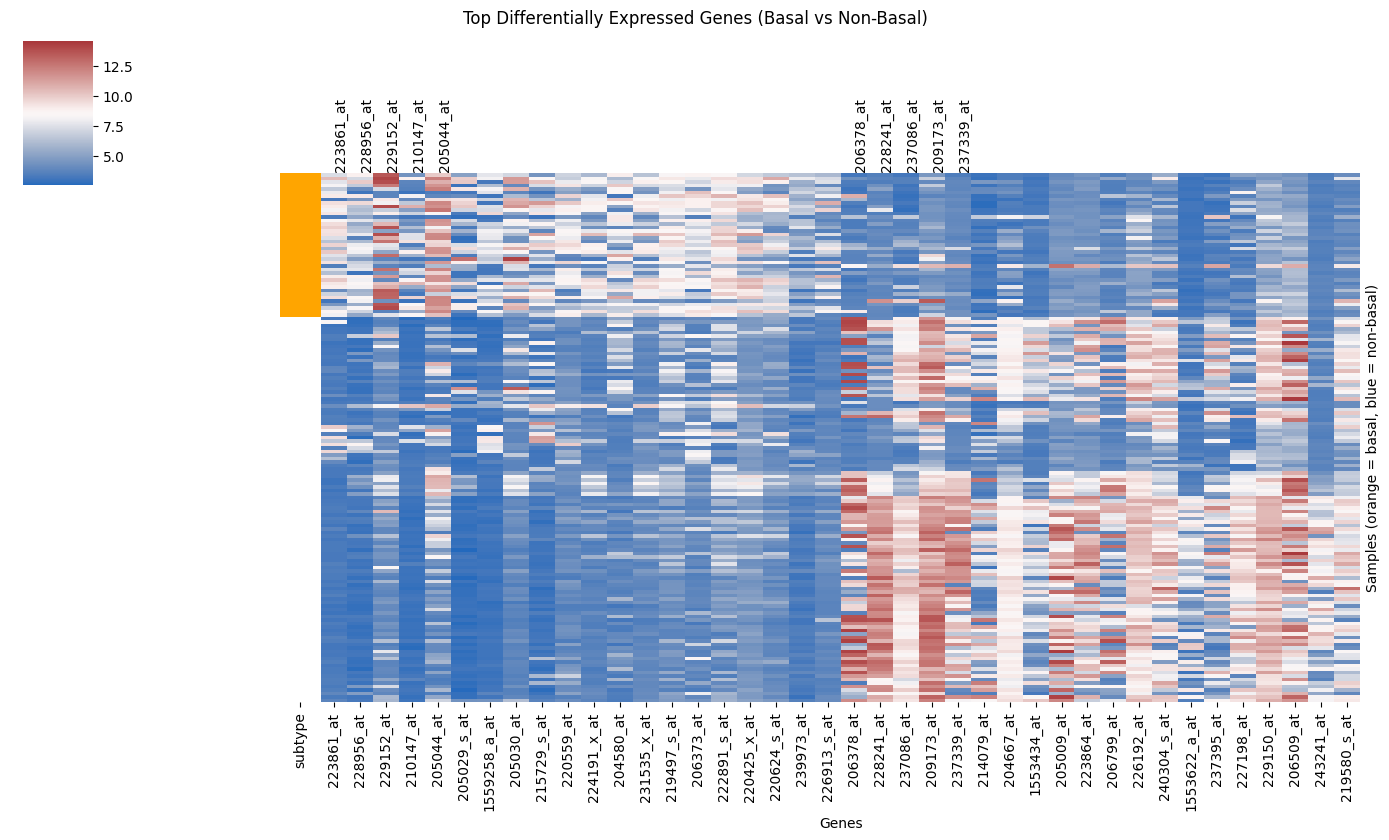

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Get top genes ---
top_basal = results_df.sort_values('Log2FC', ascending=False).head(5)['Gene']
top_non_basal = results_df.sort_values('Log2FC', ascending=True).head(5)['Gene']

# Combine for highlighting
highlight_genes = list(top_basal) + list(top_non_basal)

# Subset heatmap data to top 40 genes, but we will mark top 10
heatmap_data_for_plot = heatmap_data.copy()  # your top 40 genes
heatmap_data_for_plot = heatmap_data_for_plot.T # Transpose to make samples as rows, genes as columns

# --- Step 2: Row colors for basal vs non-basal ---
sample_colors = metadata_df['subtype'].map({'basal': 'orange', 'non-basal': 'blue'})

# --- Step 3: Plot heatmap using clustermap for row_colors functionality ---
g = sns.clustermap(
    heatmap_data_for_plot,
    cmap='vlag',
    yticklabels=False,
    row_colors=sample_colors,
    row_cluster=False,
    col_cluster=False,
    figsize=(14, 8) # Set the overall figure size for clustermap
)

# Set the title and labels on the ClusterGrid object
g.fig.suptitle("Top Differentially Expressed Genes (Basal vs Non-Basal)", y=1.02)
g.ax_heatmap.set_xlabel("Genes")
g.ax_heatmap.set_ylabel("Samples (orange = basal, blue = non-basal)")

# --- Step 4: Annotate top genes ---
# The annotations need to be placed on the heatmap axis within the ClusterGrid
for gene in highlight_genes:
    idx = heatmap_data_for_plot.columns.get_loc(gene)
    g.ax_heatmap.text(idx + 0.5, -0.5, gene, rotation=90, verticalalignment='bottom', fontsize=10, color='black')

plt.show()

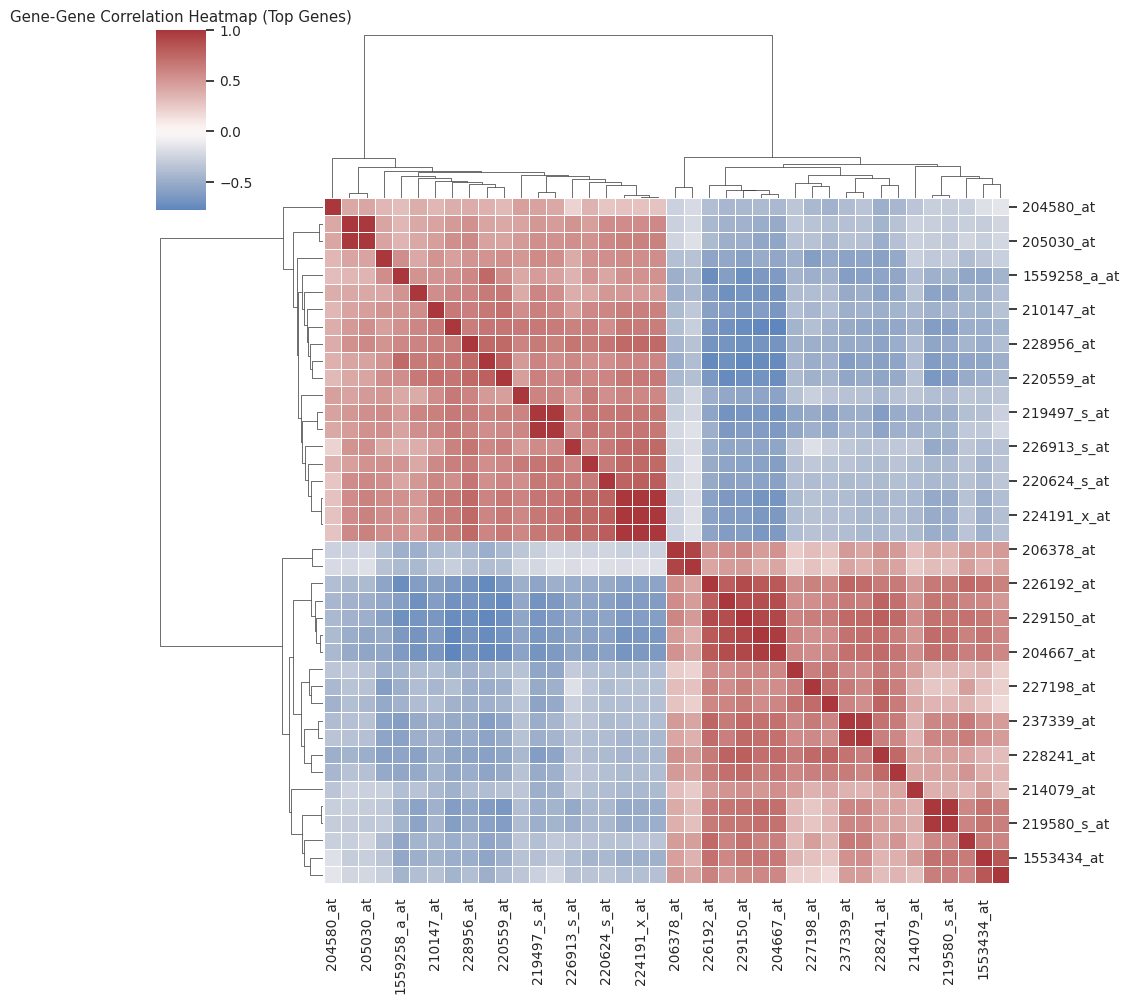

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

gene_corr_matrix = heatmap_data.T.corr()

sns.set(font_scale=0.9)
sns.clustermap(
    gene_corr_matrix,
    cmap='vlag',
    center=0,
    figsize=(10,10),
    linewidths=0.5,
    annot=False
)

plt.title("Gene-Gene Correlation Heatmap (Top Genes)")
plt.show()


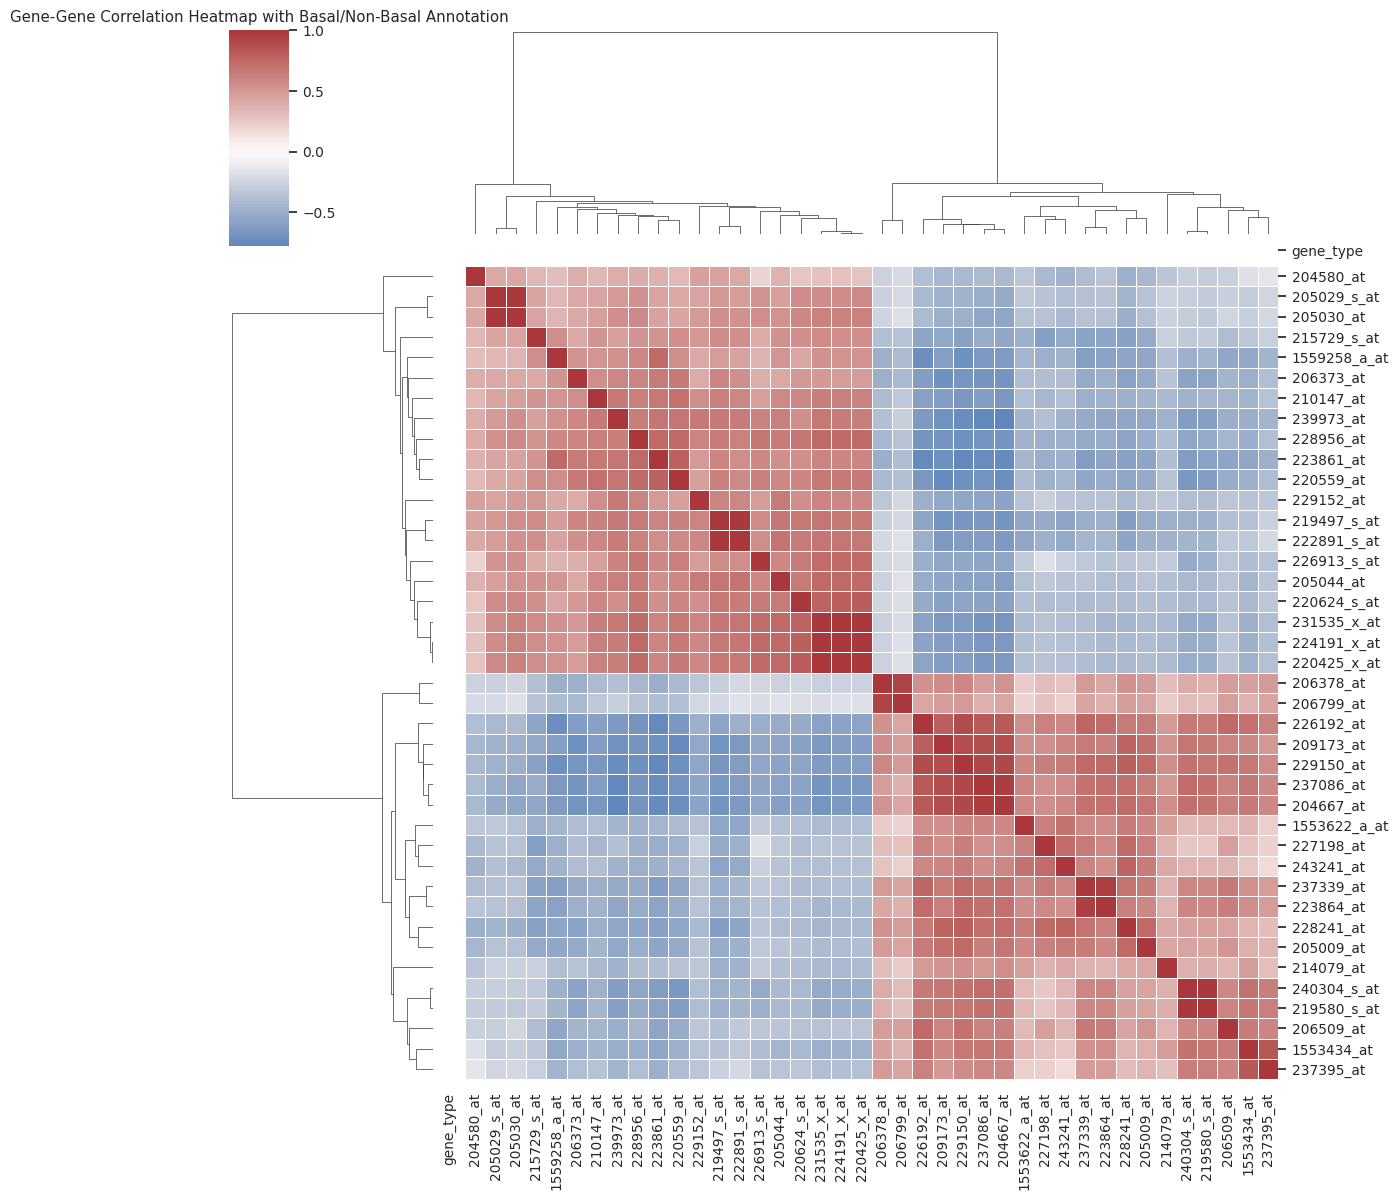

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# The error is because 'gene_types' is not defined.
# We need to create a Series that maps each gene to its category (basal/non-basal/other).
# 'heatmap_data' contains the top 40 differentially expressed genes.
# 'top_basal' and 'top_non_basal' are defined in a previous cell and contain the top 5 basal and top 5 non-basal genes, respectively.

gene_categories = {}
for gene in heatmap_data.columns:
    if gene in top_basal.tolist(): # Convert Series to list for efficient 'in' check
        gene_categories[gene] = 'basal'
    elif gene in top_non_basal.tolist(): # Convert Series to list for efficient 'in' check
        gene_categories[gene] = 'non-basal'
    else:
        gene_categories[gene] = 'other' # Assign a neutral category for genes not in top 5 or 5

gene_types = pd.Series(gene_categories, name='gene_type')

# Map colors based on the gene type
gene_color_map = {'basal':'orange', 'non-basal':'blue', 'other':'lightgrey'}
gene_colors = gene_types.map(gene_color_map)

# Compute gene-gene correlation matrix
gene_corr_matrix = heatmap_data.T.corr()  # ensure genes = rows & cols

# Plot clustermap with color bar
g = sns.clustermap(
    gene_corr_matrix,
    cmap='vlag',
    center=0,
    figsize=(12,12),
    col_colors=gene_colors,
    row_colors=gene_colors,
    linewidths=0.5
)
plt.title("Gene-Gene Correlation Heatmap with Basal/Non-Basal Annotation")
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


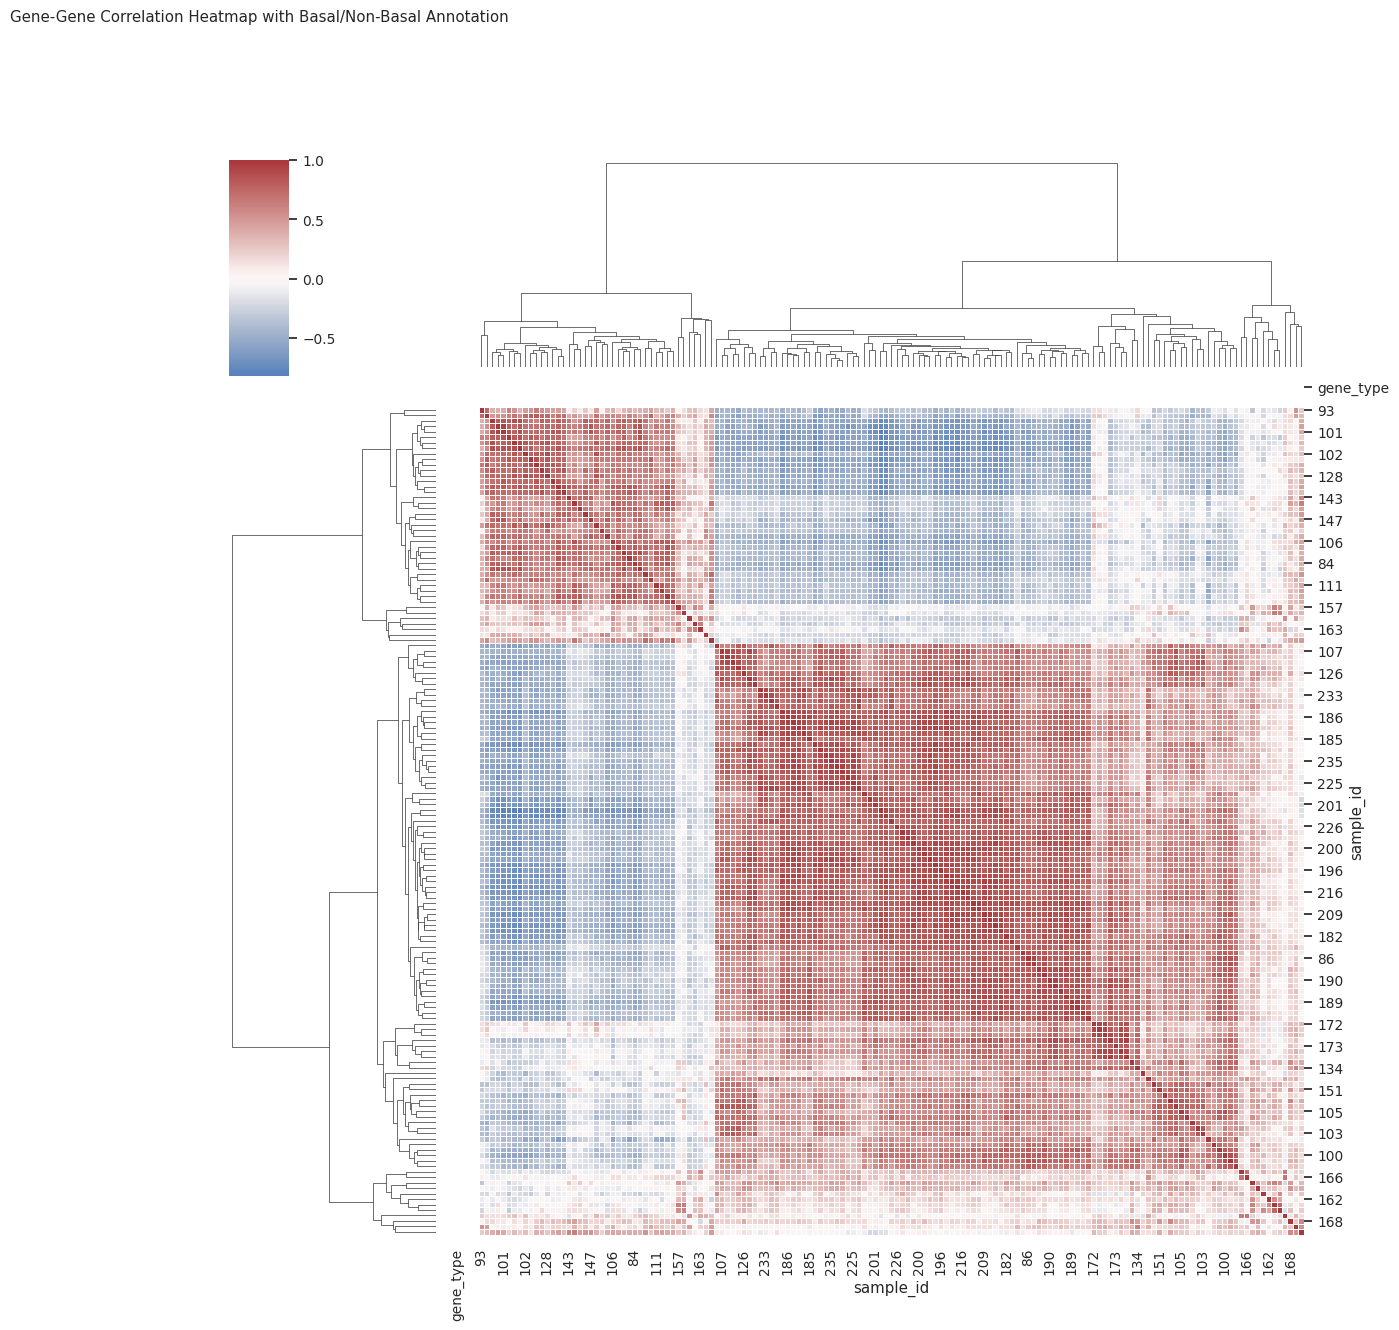

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ---- Step 1: Define the genes for the correlation matrix ----
# For gene-gene correlation, the genes are the index of the heatmap_data
top_genes_for_corr = heatmap_data.index  # These are the gene names

# ---- Step 2: Automatically assign basal/non-basal categories to genes ----
gene_categories = {}
for gene in top_genes_for_corr:
    if gene in top_basal.tolist():
        gene_categories[gene] = 'basal'
    elif gene in top_non_basal.tolist():
        gene_categories[gene] = 'non-basal'
    else:
        gene_categories[gene] = 'other' # For genes not in top N basal/non-basal

gene_types = pd.Series(gene_categories, name='gene_type')

# Map colors based on the gene type
gene_color_map = {'basal':'orange', 'non-basal':'blue', 'other':'lightgrey'}
gene_colors = gene_types.map(gene_color_map)

# ---- Step 3: Compute gene-gene correlation ----
gene_corr_matrix = heatmap_data.corr()  # heatmap_data is genes x samples, so .corr() correlates genes

# ---- Step 4: Plot heatmap with color strips ----
sns.set(font_scale=0.9)
g = sns.clustermap(
    gene_corr_matrix,
    cmap='vlag',
    center=0,
    figsize=(12,12),
    col_colors=gene_colors,
    row_colors=gene_colors,
    linewidths=0.5
)

plt.title("Gene-Gene Correlation Heatmap with Basal/Non-Basal Annotation", pad=100)
plt.show()

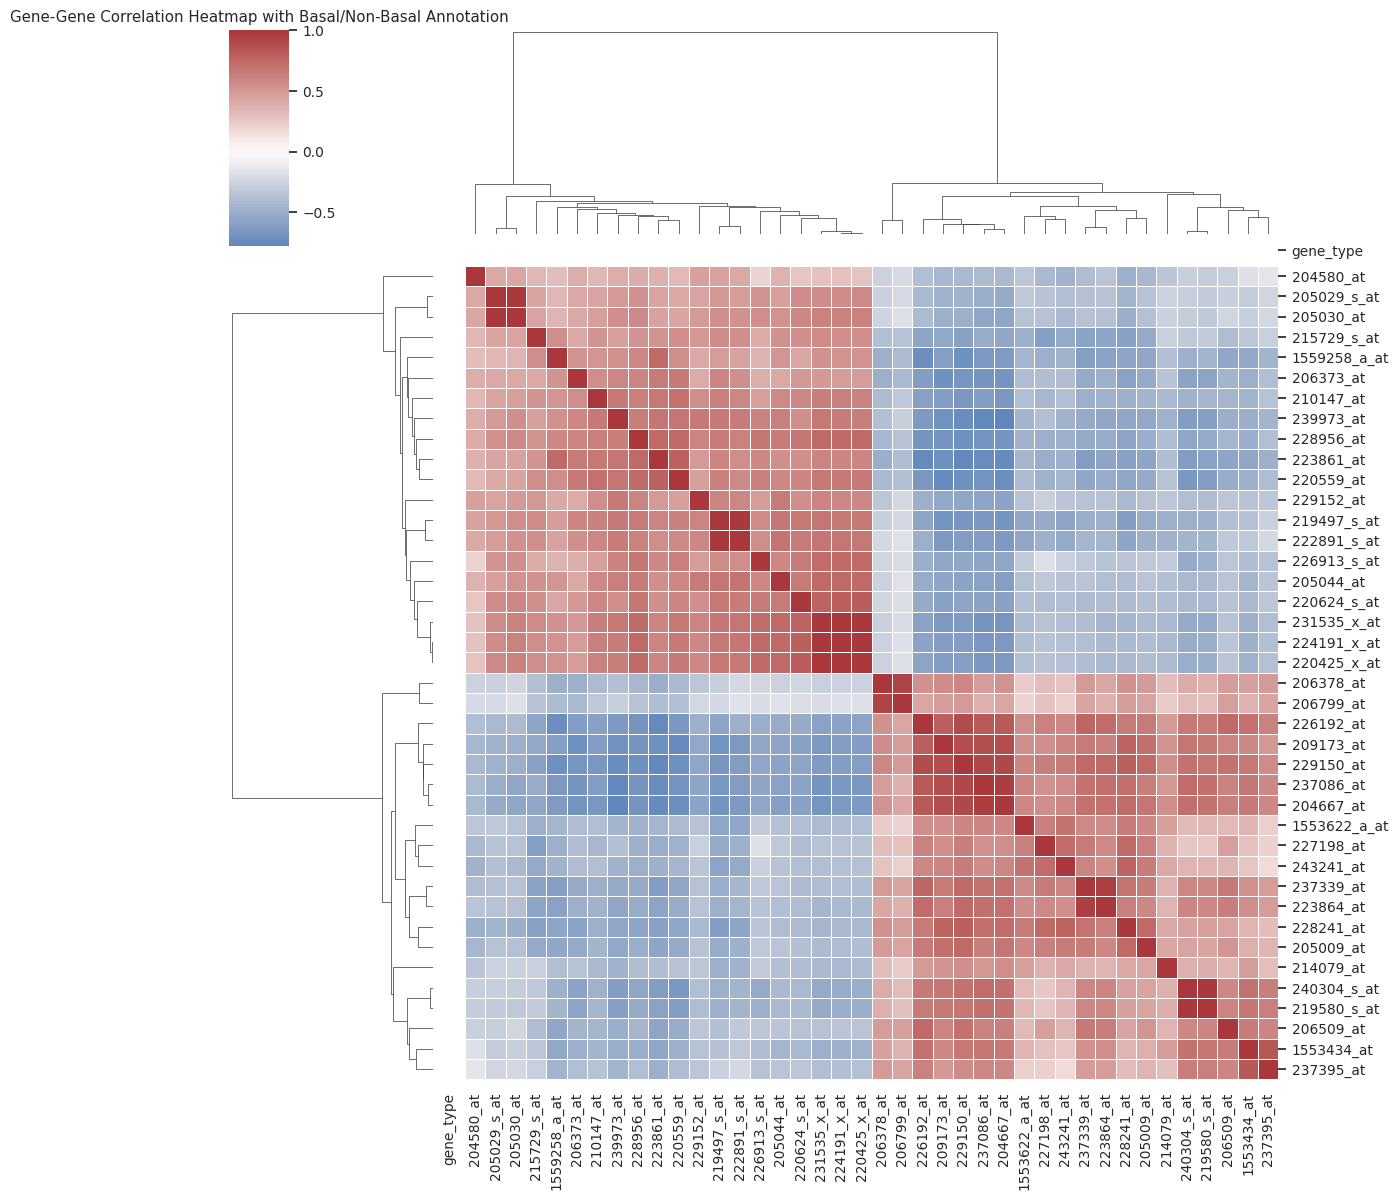

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# The error is because 'gene_types' is not defined.
# We need to create a Series that maps each gene to its category (basal/non-basal/other).
# 'heatmap_data' contains the top 40 differentially expressed genes.
# 'top_basal' and 'top_non_basal' are defined in a previous cell and contain the top 5 basal and top 5 non-basal genes, respectively.

gene_categories = {}
for gene in heatmap_data.columns:
    if gene in top_basal.tolist(): # Convert Series to list for efficient 'in' check
        gene_categories[gene] = 'basal'
    elif gene in top_non_basal.tolist(): # Convert Series to list for efficient 'in' check
        gene_categories[gene] = 'non-basal'
    else:
        gene_categories[gene] = 'other' # Assign a neutral category for genes not in top 5 or 5

gene_types = pd.Series(gene_categories, name='gene_type')

# Map colors based on the gene type
gene_color_map = {'basal':'orange', 'non-basal':'blue', 'other':'lightgrey'}
gene_colors = gene_types.map(gene_color_map)

# Compute gene-gene correlation matrix
gene_corr_matrix = heatmap_data.T.corr()  # ensure genes = rows & cols

# Plot clustermap with color bar
g = sns.clustermap(
    gene_corr_matrix,
    cmap='vlag',
    center=0,
    figsize=(12,12),
    col_colors=gene_colors,
    row_colors=gene_colors,
    linewidths=0.5
)
plt.title("Gene-Gene Correlation Heatmap with Basal/Non-Basal Annotation")
plt.show()


Genes 204580_at - 220425_x_at show are expressed together across samples, with some such as gene 223861_at & 1559258_a_at being more prominently expressed together. Overall, there is a positive association between these genes. As for Genes 237395_at - 206378_at, they are expressed together seperatley from the previous block. This shows opposite expression profiles meaning that they are rarley expressed alongside the previous block of genes.

In [28]:
# Make sure your original sample labels are accessible
# labels = df['type']  # 'basal' or 'non-basal'

# Get the sample IDs for basal and non-basal subtypes from metadata_df
basal_sample_ids = metadata_df[metadata_df['subtype'] == 'basal'].index
non_basal_sample_ids = metadata_df[metadata_df['subtype'] != 'basal'].index

# Select columns (samples) from heatmap_data using these IDs
basal_samples_expr = heatmap_data[basal_sample_ids]
non_basal_samples_expr = heatmap_data[non_basal_sample_ids]

# Compute mean expression per gene across the selected samples
# Since heatmap_data has genes as index and samples as columns, we take mean along axis=1
mean_basal = basal_samples_expr.mean(axis=1)
mean_non_basal = non_basal_samples_expr.mean(axis=1)

# Compute which genes are higher in basal vs non-basal
gene_subtype_assoc = pd.Series(
    [1 if mean_basal[gene] > mean_non_basal[gene] else 0 for gene in heatmap_data.index], # Iterate through gene names (index of heatmap_data)
    index=heatmap_data.index
)

# 1 = basal-associated, 0 = non-basal-associated

# Example: block 1 = first 15 genes
block1 = heatmap_data.index[:15] # Select first 15 gene names
block2 = heatmap_data.index[15:] # Select remaining gene names

print("Block 1 subtype association:")
print(gene_subtype_assoc[block1])

print("Block 2 subtype association:")
print(gene_subtype_assoc[block2])

Block 1 subtype association:
223861_at       1
228956_at       1
229152_at       1
210147_at       1
205044_at       1
205029_s_at     1
1559258_a_at    1
205030_at       1
215729_s_at     1
220559_at       1
224191_x_at     1
204580_at       1
231535_x_at     1
219497_s_at     1
206373_at       1
dtype: int64
Block 2 subtype association:
222891_s_at     1
220425_x_at     1
220624_s_at     1
239973_at       1
226913_s_at     1
206378_at       0
228241_at       0
237086_at       0
209173_at       0
237339_at       0
214079_at       0
204667_at       0
1553434_at      0
205009_at       0
223864_at       0
206799_at       0
226192_at       0
240304_s_at     0
1553622_a_at    0
237395_at       0
227198_at       0
229150_at       0
206509_at       0
243241_at       0
219580_s_at     0
dtype: int64


Block #1 shows coexpression between genes 223861_at - 206373_at, which are all fully basal associated. Block #2, however, is skewed towards non-basal association with some basal-associated genes. In other words, Block #1 is fully basal asociated while block #2 is skewed towards non-basal while having slight basal association.